In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [249]:
df = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')

In [250]:
df

Unnamed: 0       region  customer_lifetime_value response  coverage  \
0               0      central                     4809       no     basic   
1               1  west region                     2228       no     basic   
2               2         east                    14947       no     basic   
3               3   north west                    22332      yes  extended   
4               4   north west                     9025       no   premium   
...           ...          ...                      ...      ...       ...   
10684       10684      central                    15563       no   premium   
10685       10685   north west                     5259       no     basic   
10686       10686      central                    23893       no  extended   
10687       10687  west region                    11971       no   premium   
10688       10688  west region                     6857       no     basic   

      education effective_to_date month employment_status gender  ...  \
0       college           2/18/11   feb          employed      m  ...   
1       college           1/18/11   jan        unemployed      f  ...   
2      bachelor           2/10/11   feb          employed      m  ...   
3       college           1/11/11   jan          employed      m  ...   
4      bachelor           1/17/11   jan     medical leave      f  ...   
...         ...               ...   ...               ...    ...  ...   
10684  bachelor           1/19/11   jan        unemployed      f  ...   
10685   college            1/6/11   jan          employed      f  ...   
10686  bachelor            2/6/11   feb          employed      f  ...   
10687   college           2/13/11   feb          employed      f  ...   
10688  bachelor            1/8/11   jan        unemployed      m  ...   

       months_since_policy_inception number_of_open_complaints  \
0                                 52                         0   
1                                 26                         0   
2                                 31                         0   
3                                  3                         0   
4                                 31                         1   
...                              ...                       ...   
10684                             40                         2   
10685                             68                         0   
10686                             63                         0   
10687                             27                         4   
10688                              1                         0   

      number_of_policies     policy_type        policy  renew_offer_type  \
0                      9  corporate auto  corporate l3            offer3   
1                      1   personal auto   personal l3            offer4   
2                      2   personal auto   personal l3            offer3   
3                      2  corporate auto  corporate l3            offer2   
4                      7   personal auto   personal l2            offer1   
...                  ...             ...           ...               ...   
10684                  7   personal auto   personal l1            offer3   
10685                  6   personal auto   personal l3            offer2   
10686                  2  corporate auto  corporate l3            offer1   
10687                  6   personal auto   personal l1            offer1   
10688                  3   personal auto   personal l1            offer4   

       sales_channel  total_claim_amount  vehicle_class vehicle_size  
0              agent                 292  four-door car      medsize  
1        call center                 744  four-door car      medsize  
2        call center                 480            suv      medsize  
3             branch                 484  four-door car      medsize  
4             branch                 707  four-door car      medsize  
...              ...                 ...            ...      

In [251]:
df.columns

Index(['Unnamed: 0', 'region', 'customer_lifetime_value', 'response',
       'coverage', 'education', 'effective_to_date', 'month',
       'employment_status', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [252]:
#sns.pairplot(df)

## Correlation Heatmap


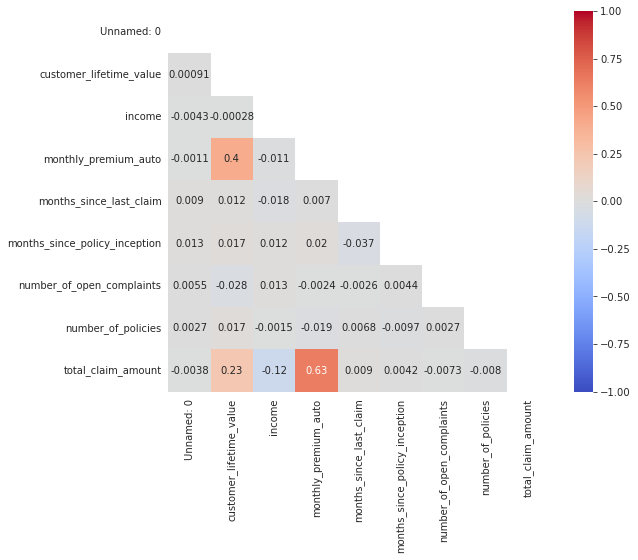

In [253]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [254]:
corr_matrix=df.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
drop_col = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.39)]

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     10689 non-null  int64 
 1   region                         10689 non-null  object
 2   customer_lifetime_value        10689 non-null  int64 
 3   response                       10689 non-null  object
 4   coverage                       10689 non-null  object
 5   education                      10689 non-null  object
 6   effective_to_date              10689 non-null  object
 7   month                          10689 non-null  object
 8   employment_status              10689 non-null  object
 9   gender                         10689 non-null  object
 10  income                         10689 non-null  int64 
 11  location_code                  10689 non-null  object
 12  marital_status                 10689 non-null  object
 13  m

In [256]:
#df.drop(drop_col,\
#           axis=1,inplace=True)

In [257]:
df

Unnamed: 0       region  customer_lifetime_value response  coverage  \
0               0      central                     4809       no     basic   
1               1  west region                     2228       no     basic   
2               2         east                    14947       no     basic   
3               3   north west                    22332      yes  extended   
4               4   north west                     9025       no   premium   
...           ...          ...                      ...      ...       ...   
10684       10684      central                    15563       no   premium   
10685       10685   north west                     5259       no     basic   
10686       10686      central                    23893       no  extended   
10687       10687  west region                    11971       no   premium   
10688       10688  west region                     6857       no     basic   

      education effective_to_date month employment_status gender  ...  \
0       college           2/18/11   feb          employed      m  ...   
1       college           1/18/11   jan        unemployed      f  ...   
2      bachelor           2/10/11   feb          employed      m  ...   
3       college           1/11/11   jan          employed      m  ...   
4      bachelor           1/17/11   jan     medical leave      f  ...   
...         ...               ...   ...               ...    ...  ...   
10684  bachelor           1/19/11   jan        unemployed      f  ...   
10685   college            1/6/11   jan          employed      f  ...   
10686  bachelor            2/6/11   feb          employed      f  ...   
10687   college           2/13/11   feb          employed      f  ...   
10688  bachelor            1/8/11   jan        unemployed      m  ...   

       months_since_policy_inception number_of_open_complaints  \
0                                 52                         0   
1                                 26                         0   
2                                 31                         0   
3                                  3                         0   
4                                 31                         1   
...                              ...                       ...   
10684                             40                         2   
10685                             68                         0   
10686                             63                         0   
10687                             27                         4   
10688                              1                         0   

      number_of_policies     policy_type        policy  renew_offer_type  \
0                      9  corporate auto  corporate l3            offer3   
1                      1   personal auto   personal l3            offer4   
2                      2   personal auto   personal l3            offer3   
3                      2  corporate auto  corporate l3            offer2   
4                      7   personal auto   personal l2            offer1   
...                  ...             ...           ...               ...   
10684                  7   personal auto   personal l1            offer3   
10685                  6   personal auto   personal l3            offer2   
10686                  2  corporate auto  corporate l3            offer1   
10687                  6   personal auto   personal l1            offer1   
10688                  3   personal auto   personal l1            offer4   

       sales_channel  total_claim_amount  vehicle_class vehicle_size  
0              agent                 292  four-door car      medsize  
1        call center                 744  four-door car      medsize  
2        call center                 480            suv      medsize  
3             branch                 484  four-door car      medsize  
4             branch                 707  four-door car      medsize  
...              ...                 ...            ...      

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>],
       [<AxesSubplot:title={'center':'number_of_open_complaints'}>,
        <AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>]],
      dtype=object)

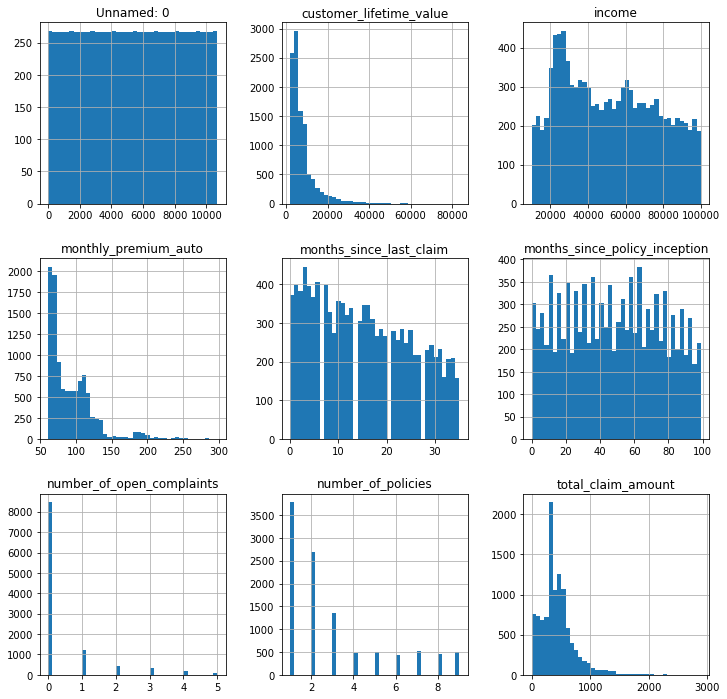

In [258]:
df.select_dtypes('int').hist(figsize=(12,12), bins=40)

## Transforming to normal distribution

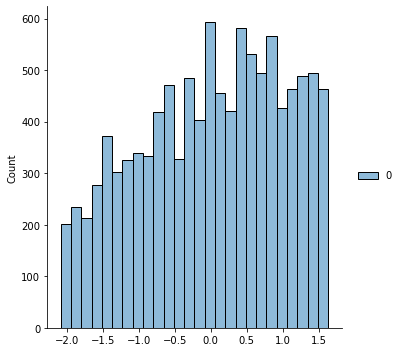

In [259]:
## months_since_policy_inception

pt = PowerTransformer()
months_since_policy_inception_transformed=pt.fit_transform(df['months_since_policy_inception'].to_numpy().reshape(-1,1))
sns.displot(months_since_policy_inception_transformed)

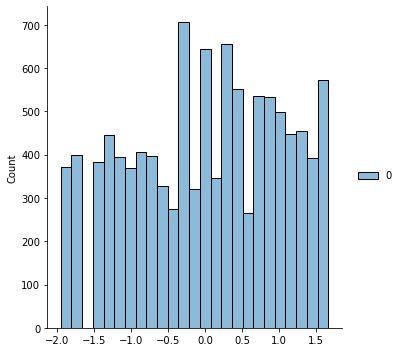

In [260]:
## months_since_last_claim

pt = PowerTransformer()
months_since_last_claim_transformed=pt.fit_transform(df['months_since_last_claim'].to_numpy().reshape(-1,1))
sns.displot(months_since_last_claim_transformed)

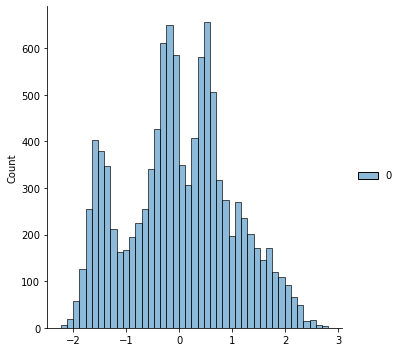

In [261]:
## customer_lifetime_value_transformed

pt = PowerTransformer()
customer_lifetime_value_transformed=pt.fit_transform(df['customer_lifetime_value'].to_numpy().reshape(-1,1))
sns.displot(customer_lifetime_value_transformed)

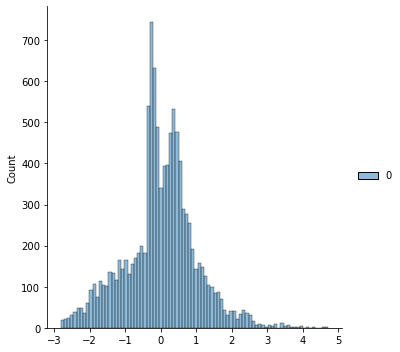

In [262]:
## total_claim_amount
pt = PowerTransformer()
total_claim_amount_transformed=pt.fit_transform(df['total_claim_amount'].to_numpy().reshape(-1,1))
sns.displot(total_claim_amount_transformed)



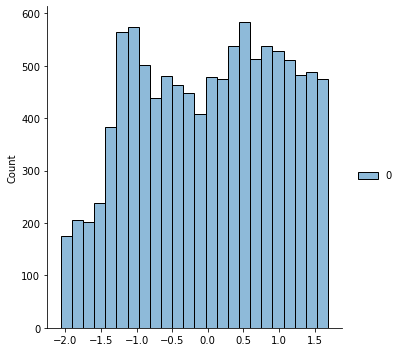

In [263]:
##income

pt = PowerTransformer()
income_transformed=pt.fit_transform(df['income'].to_numpy().reshape(-1,1))
sns.displot(income_transformed)

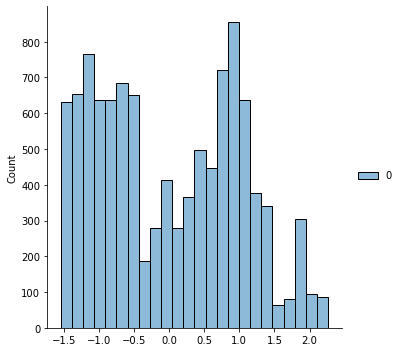

In [264]:
## monthly premium auto
pt = PowerTransformer()
monthly_premium_auto_transformed=pt.fit_transform(df['monthly_premium_auto'].to_numpy().reshape(-1,1))
sns.displot(monthly_premium_auto_transformed)


In [265]:
## add transformed columns, drop untransformed

In [266]:
transformed_cols = ['months_since_last_claim_transformed', 'months_since_policy_inception_transformed', 
'monthly_premium_auto_transformed', 'income_transformed', 'total_claim_amount_transformed', 
'customer_lifetime_value_transformed']


df["months_since_last_claim_transformed"]= months_since_last_claim_transformed
df.drop(["months_since_last_claim"],axis=1,inplace=True)


df["months_since_policy_inception_transformed"]= months_since_policy_inception_transformed
df.drop(["months_since_policy_inception"],axis=1,inplace=True)


df["monthly_premium_auto_transformed"]= monthly_premium_auto_transformed
df.drop(["monthly_premium_auto"],axis=1,inplace=True)

df["income_transformed"]= income_transformed
df.drop(["income"],axis=1,inplace=True)

df["total_claim_amount_transformed"]= total_claim_amount_transformed
df.drop(["total_claim_amount"],axis=1,inplace=True)

df["customer_lifetime_value_transformed"]= customer_lifetime_value_transformed
df.drop(["customer_lifetime_value"],axis=1,inplace=True)

In [267]:
df

Unnamed: 0       region response  coverage education effective_to_date  \
0               0      central       no     basic   college           2/18/11   
1               1  west region       no     basic   college           1/18/11   
2               2         east       no     basic  bachelor           2/10/11   
3               3   north west      yes  extended   college           1/11/11   
4               4   north west       no   premium  bachelor           1/17/11   
...           ...          ...      ...       ...       ...               ...   
10684       10684      central       no   premium  bachelor           1/19/11   
10685       10685   north west       no     basic   college            1/6/11   
10686       10686      central       no  extended  bachelor            2/6/11   
10687       10687  west region       no   premium   college           2/13/11   
10688       10688  west region       no     basic  bachelor            1/8/11   

      month employment_status gender location_code  ... renew_offer_type  \
0       feb          employed      m      suburban  ...           offer3   
1       jan        unemployed      f      suburban  ...           offer4   
2       feb          employed      m      suburban  ...           offer3   
3       jan          employed      m      suburban  ...           offer2   
4       jan     medical leave      f      suburban  ...           offer1   
...     ...               ...    ...           ...  ...              ...   
10684   jan        unemployed      f      suburban  ...           offer3   
10685   jan          employed      f         urban  ...           offer2   
10686   feb          employed      f         rural  ...           offer1   
10687   feb          employed      f         urban  ...           offer1   
10688   jan        unemployed      m      suburban  ...           offer4   

       sales_channel  vehicle_class vehicle_size  \
0              agent  four-door car      medsize   
1        call center  four-door car      medsize   
2        call center            suv      medsize   
3             branch  four-door car      medsize   
4             branch  four-door car      medsize   
...              ...            ...          ...   
10684            web     luxury car      medsize   
10685         branch  four-door car      medsize   
10686            web     luxury suv      medsize   
10687         branch            suv      medsize   
10688            web            suv      medsize   

      months_since_last_claim_transformed  \
0                               -0.707585   
1                               -1.287286   
2                                1.594909   
3                               -0.356663   
4                                0.144039   
...                                   ...   
10684                           -0.584960   
10685                           -0.707585   
10686                           -0.249493   
10687                           -1.950493   
10688                            1.395141   

      months_since_policy_inception_transformed  \
0                                      0.226102   
1                                     -0.713030   
2                                     -0.517163   
3                                     -1.844389   
4                                     -0.517163   
...                                         ...   
10684                                 -0.185352   
10685                                  0.735155   
10686                                  0.580123   
10687                                 -0.673076   
10688                                 -1.996458   

      monthly_premium_auto_transformed income_transformed  \
0                            -1.543067          -0.025953   
1                            -1.257388          -0.988621   
2                             0.630095          -1.244098   
3                             0.536569           0.015717   
4                             1.05135

## Transforming number_of_open_complaints and number_of_policies to Object

In [268]:
df['number_of_open_complaints'] = df['number_of_open_complaints'].astype('object')
df['number_of_policies']=df['number_of_policies'].astype('object')

In [269]:
categoricals_features=df.select_dtypes("object")
categoricals_features

region response  coverage education effective_to_date month  \
0          central       no     basic   college           2/18/11   feb   
1      west region       no     basic   college           1/18/11   jan   
2             east       no     basic  bachelor           2/10/11   feb   
3       north west      yes  extended   college           1/11/11   jan   
4       north west       no   premium  bachelor           1/17/11   jan   
...            ...      ...       ...       ...               ...   ...   
10684      central       no   premium  bachelor           1/19/11   jan   
10685   north west       no     basic   college            1/6/11   jan   
10686      central       no  extended  bachelor            2/6/11   feb   
10687  west region       no   premium   college           2/13/11   feb   
10688  west region       no     basic  bachelor            1/8/11   jan   

      employment_status gender location_code marital_status  \
0              employed      m      suburban        married   
1            unemployed      f      suburban         single   
2              employed      m      suburban         single   
3              employed      m      suburban         single   
4         medical leave      f      suburban        married   
...                 ...    ...           ...            ...   
10684        unemployed      f      suburban        married   
10685          employed      f         urban        married   
10686          employed      f         rural        married   
10687          employed      f         urban       divorced   
10688        unemployed      m      suburban         single   

      number_of_open_complaints number_of_policies     policy_type  \
0                             0                  9  corporate auto   
1                             0                  1   personal auto   
2                             0                  2   personal auto   
3                             0                  2  corporate auto   
4                             1                  7   personal auto   
...                         ...                ...             ...   
10684                         2                  7   personal auto   
10685                         0                  6   personal auto   
10686                         0                  2  corporate auto   
10687                         4                  6   personal auto   
10688                         0                  3   personal auto   

             policy renew_offer_type sales_channel  vehicle_class vehicle_size  
0      corporate l3           offer3         agent  four-door car      medsize  
1       personal l3           offer4   call center  four-door car      medsize  
2       personal l3           offer3   call center            suv      medsize  
3      corporate l3           offer2        branch  four-door car      medsize  
4       personal l2           offer1        branch  four-door car      medsize  
...             ...              ...           ...            ...          ...  
10684   personal l1           offer3           web     luxury car      medsize  
10685   personal l3           offer2        branch  four-door car      medsize  
10686  corporate l3           offer1           web     luxury suv      medsize  
10687   personal l1           offer1        branch            suv      medsize  
10688   personal l1           offer4           web            suv      medsize  

[10689 rows x 18 columns]

## remove outliers

In [270]:
print(transformed_cols)

df

['months_since_last_claim_transformed', 'months_since_policy_inception_transformed', 'monthly_premium_auto_transformed', 'income_transformed', 'total_claim_amount_transformed', 'customer_lifetime_value_transformed']


Unnamed: 0       region response  coverage education effective_to_date  \
0               0      central       no     basic   college           2/18/11   
1               1  west region       no     basic   college           1/18/11   
2               2         east       no     basic  bachelor           2/10/11   
3               3   north west      yes  extended   college           1/11/11   
4               4   north west       no   premium  bachelor           1/17/11   
...           ...          ...      ...       ...       ...               ...   
10684       10684      central       no   premium  bachelor           1/19/11   
10685       10685   north west       no     basic   college            1/6/11   
10686       10686      central       no  extended  bachelor            2/6/11   
10687       10687  west region       no   premium   college           2/13/11   
10688       10688  west region       no     basic  bachelor            1/8/11   

      month employment_status gender location_code  ... renew_offer_type  \
0       feb          employed      m      suburban  ...           offer3   
1       jan        unemployed      f      suburban  ...           offer4   
2       feb          employed      m      suburban  ...           offer3   
3       jan          employed      m      suburban  ...           offer2   
4       jan     medical leave      f      suburban  ...           offer1   
...     ...               ...    ...           ...  ...              ...   
10684   jan        unemployed      f      suburban  ...           offer3   
10685   jan          employed      f         urban  ...           offer2   
10686   feb          employed      f         rural  ...           offer1   
10687   feb          employed      f         urban  ...           offer1   
10688   jan        unemployed      m      suburban  ...           offer4   

      sales_channel  vehicle_class vehicle_size  \
0             agent  four-door car      medsize   
1       call center  four-door car      medsize   
2       call center            suv      medsize   
3            branch  four-door car      medsize   
4            branch  four-door car      medsize   
...             ...            ...          ...   
10684           web     luxury car      medsize   
10685        branch  four-door car      medsize   
10686           web     luxury suv      medsize   
10687        branch            suv      medsize   
10688           web            suv      medsize   

      months_since_last_claim_transformed  \
0                               -0.707585   
1                               -1.287286   
2                                1.594909   
3                               -0.356663   
4                                0.144039   
...                                   ...   
10684                           -0.584960   
10685                           -0.707585   
10686                           -0.249493   
10687                           -1.950493   
10688                            1.395141   

      months_since_policy_inception_transformed  \
0                                      0.226102   
1                                     -0.713030   
2                                     -0.517163   
3                                     -1.844389   
4                                     -0.517163   
...                                         ...   
10684                                 -0.185352   
10685                                  0.735155   
10686                                  0.580123   
10687                                 -0.673076   
10688                                 -1.996458   

      monthly_premium_auto_transformed income_transformed  \
0                            -1.543067          -0.025953   
1                            -1.257388          -0.988621   
2                             0.630095          -1.244098   
3                             0.536569           0.015717   
4                             1.051350          -

In [271]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

for i in transformed_cols: 
    remove_outlier(df, i )

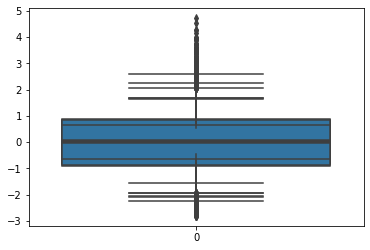

In [272]:
for i in transformed_cols:
    ax = sns.boxplot(data=df[i])
    
plt.show()

## One-hot encoding
 Also get nominal encoding
 Use sciekitlearn 

In [273]:
col_names_object = list(df.select_dtypes("object").columns)
col_names_object

['region',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'month',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [274]:
categoricals_features=pd.get_dummies(categoricals_features[col_names_object], drop_first=True)


C:\Users\Lenovo\anaconda3\envs\DA_Env\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [275]:
list(categoricals_features.columns)

['region_east',
 'region_north west',
 'region_west region',
 'response_yes',
 'coverage_extended',
 'coverage_premium',
 'education_college',
 'education_doctor',
 'education_high school or below',
 'education_master',
 'effective_to_date_1/10/11',
 'effective_to_date_1/11/11',
 'effective_to_date_1/12/11',
 'effective_to_date_1/13/11',
 'effective_to_date_1/14/11',
 'effective_to_date_1/15/11',
 'effective_to_date_1/16/11',
 'effective_to_date_1/17/11',
 'effective_to_date_1/18/11',
 'effective_to_date_1/19/11',
 'effective_to_date_1/2/11',
 'effective_to_date_1/20/11',
 'effective_to_date_1/21/11',
 'effective_to_date_1/22/11',
 'effective_to_date_1/23/11',
 'effective_to_date_1/24/11',
 'effective_to_date_1/25/11',
 'effective_to_date_1/26/11',
 'effective_to_date_1/27/11',
 'effective_to_date_1/28/11',
 'effective_to_date_1/29/11',
 'effective_to_date_1/3/11',
 'effective_to_date_1/30/11',
 'effective_to_date_1/31/11',
 'effective_to_date_1/4/11',
 'effective_to_date_1/5/11',
 'ef

##  Split X-y   "total-claim-amount"

In [276]:
X=df.drop('total_claim_amount_transformed', axis=1)
y=df['total_claim_amount_transformed']

In [277]:
X=X._get_numeric_data()
X=X.drop('Unnamed: 0', axis = 1)

In [278]:
X.columns

Index(['months_since_last_claim_transformed',
       'months_since_policy_inception_transformed',
       'monthly_premium_auto_transformed', 'income_transformed',
       'customer_lifetime_value_transformed'],
      dtype='object')

array([[<AxesSubplot:title={'center':'months_since_last_claim_transformed'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception_transformed'}>],
       [<AxesSubplot:title={'center':'monthly_premium_auto_transformed'}>,
        <AxesSubplot:title={'center':'income_transformed'}>],
       [<AxesSubplot:title={'center':'customer_lifetime_value_transformed'}>,
        <AxesSubplot:>]], dtype=object)

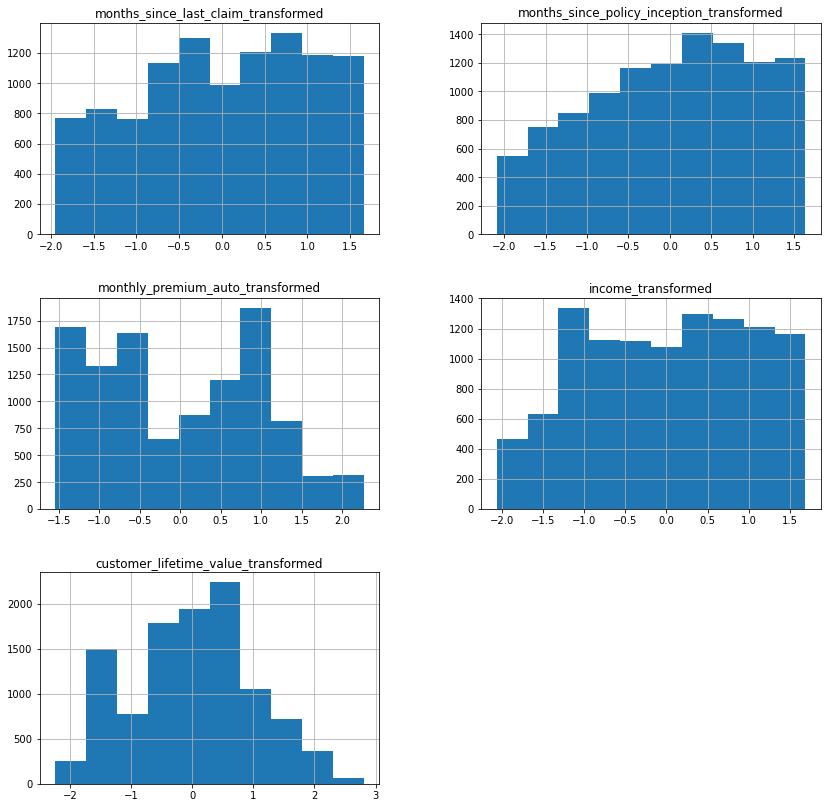

In [279]:
X.hist(figsize=(14,14))

In [280]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

## standardize

In [281]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [282]:
X_train.shape

(7482, 5)

In [283]:
X_test_scaled=std_scaler.transform(X_test)

In [284]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 0.81795523  1.27629636 -0.77754691 -1.35179072  0.32997462]
 [-0.83366762  1.53128583 -0.92733872 -1.51330715 -0.24260663]
 [-0.83366762  0.5553196   0.89843353  0.36524855 -0.48102283]
 ...
 [-0.97166034 -1.48118793 -1.44887594 -1.20733744 -1.66448717]
 [ 0.96941419 -1.84114595 -1.08832257  0.97305934  1.77858507]
 [ 0.89435904  0.29818383 -0.50741965  0.10582615  1.38088528]]
--------
[[ 0.41249601  1.41884483 -0.63788566 -0.91683424 -0.20119286]
 [ 1.32684494  0.77268733 -0.70651115 -0.89911608 -1.37253895]
 [-1.94513578  0.46005973 -1.44887594 -1.29460229  1.01729109]
 ...
 [ 0.89435904 -1.18249377 -0.5715573   0.66895214 -1.58719463]
 [ 0.66076476 -1.84114595 -1.17338289 -0.94249283 -0.23693875]
 [ 1.52900525 -0.95806645  1.07316405 -0.92118989 -0.41746808]]


## Linear Regression

In [285]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                                  OLS Regression Results                                  
Dep. Variable:     total_claim_amount_transformed   R-squared:                       0.260
Model:                                        OLS   Adj. R-squared:                  0.259
Method:                             Least Squares   F-statistic:                     524.6
Date:                            Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                                    16:58:35   Log-Likelihood:                -9507.4
No. Observations:                            7482   AIC:                         1.903e+04
Df Residuals:                                7476   BIC:                         1.907e+04
Df Model:                                       5                                         
Covariance Type:                        nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

In [286]:
predictions_test

array([-0.17795542, -0.19331702, -0.55517369, ..., -0.3616509 ,
       -0.44728348,  0.6749501 ])

In [287]:
#display adjusted R-squared
print(model.rsquared_adj)

0.25922502504371336


In [288]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [289]:
model.coef_

array([ 0.00258949,  0.00244522,  0.49757083, -0.14882225, -0.01761528])

In [290]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [291]:
X

months_since_last_claim_transformed  \
0                                -0.707585   
1                                -1.287286   
2                                 1.594909   
3                                -0.356663   
4                                 0.144039   
...                                    ...   
10684                            -0.584960   
10685                            -0.707585   
10686                            -0.249493   
10687                            -1.950493   
10688                             1.395141   

       months_since_policy_inception_transformed  \
0                                       0.226102   
1                                      -0.713030   
2                                      -0.517163   
3                                      -1.844389   
4                                      -0.517163   
...                                          ...   
10684                                  -0.185352   
10685                                   0.735155   
10686                                   0.580123   
10687                                  -0.673076   
10688                                  -1.996458   

       monthly_premium_auto_transformed  income_transformed  \
0                             -1.543067           -0.025953   
1                             -1.257388           -0.988621   
2                              0.630095           -1.244098   
3                              0.536569            0.015717   
4                              1.051350           -1.157227   
...                                 ...                 ...   
10684                          2.153036            0.596834   
10685                         -1.169288            0.467997   
10686                          1.942693           -0.367370   
10687                          1.631315            0.575424   
10688                          0.659758            1.366624   

       customer_lifetime_value_transformed  
0                                -0.336143  
1                                -1.867205  
2                                 1.292270  
3                                 1.731625  
4                                 0.646025  
...                                    ...  
10684                             1.339279  
10685                            -0.183187  
10686                             1.799731  
10687                             1.021741  
10688                             0.243594  

[10689 rows x 5 columns]

In [292]:
## new record 
#new_data=[2000,450,18,25]
#new_data_scaled=std_scaler.transform(np.array(new_data).reshape(-1,4))
#np.array(np.array(new_data).reshape(-1,4)).shape

In [293]:
y_test

4665    -0.141094
4072    -0.141094
4549    -0.507755
4211     0.219315
3081     0.471338
           ...   
3488     0.077359
1667     0.565906
1516    -0.121847
10215   -2.118202
2931    -0.239630
Name: total_claim_amount_transformed, Length: 3207, dtype: float64

In [294]:
y_pred

array([-0.17795542, -0.19331702, -0.55517369, ..., -0.3616509 ,
       -0.44728348,  0.6749501 ])

In [295]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

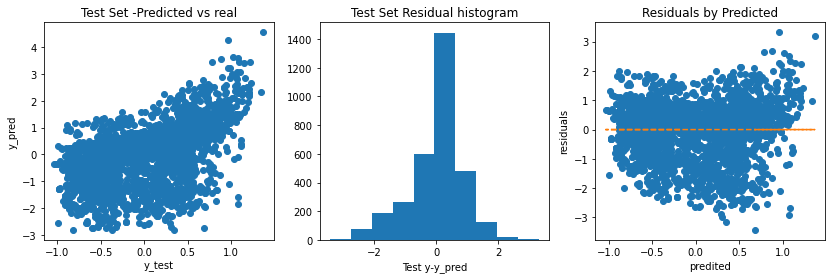

In [296]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

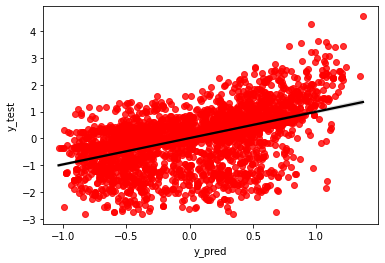

In [297]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

## Add categoricals to model

In [298]:
col_names_object

['region',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'month',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [299]:
categoricals_features

region_east  region_north west  region_west region  response_yes  \
0                0                  0                   0             0   
1                0                  0                   1             0   
2                1                  0                   0             0   
3                0                  1                   0             1   
4                0                  1                   0             0   
...            ...                ...                 ...           ...   
10684            0                  0                   0             0   
10685            0                  1                   0             0   
10686            0                  0                   0             0   
10687            0                  0                   1             0   
10688            0                  0                   1             0   

       coverage_extended  coverage_premium  education_college  \
0                      0                 0                  1   
1                      0                 0                  1   
2                      0                 0                  0   
3                      1                 0                  1   
4                      0                 1                  0   
...                  ...               ...                ...   
10684                  0                 1                  0   
10685                  0                 0                  1   
10686                  1                 0                  0   
10687                  0                 1                  1   
10688                  0                 0                  0   

       education_doctor  education_high school or below  education_master  \
0                     0                               0                 0   
1                     0                               0                 0   
2                     0                               0                 0   
3                     0                               0                 0   
4                     0                               0                 0   
...                 ...                             ...               ...   
10684                 0                               0                 0   
10685                 0                               0                 0   
10686                 0                               0                 0   
10687                 0                               0                 0   
10688                 0                               0                 0   

       ...  sales_channel_branch  sales_channel_call center  \
0      ...                     0                          0   
1      ...                     0                          1   
2      ...                     0                          1   
3      ...                     1                          0   
4      ...                     1                          0   
...    ...                   ...                        ...   
10684  ...                     0                          0   
10685  ...                     1                          0   
10686  ...                     0                          0   
10687  ...                     1                          0   
10688  ...                     0                          0   

       sales_channel_web  vehicle_class_luxury car  vehicle_class_luxury suv  \
0                      0                         0                         0   
1                      0                         0                         0   
2                      0                         0                         0   
3                      0                         0                         0   
4                      0                         0                         0   
...                  ...                       ...                       ...   
10684                  1                         1                         0   
106

In [300]:
## add one-hot encoded, drop cat

df = df.drop(col_names_object, axis=1)


In [301]:
df[categoricals_features.columns] = categoricals_features
df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7672\373345703.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[categoricals_features.columns] = categoricals_features
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7672\373345703.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[categoricals_features.columns] = categoricals_features
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7672\373345703.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has 

Unnamed: 0  months_since_last_claim_transformed  \
0               0                            -0.707585   
1               1                            -1.287286   
2               2                             1.594909   
3               3                            -0.356663   
4               4                             0.144039   
...           ...                                  ...   
10684       10684                            -0.584960   
10685       10685                            -0.707585   
10686       10686                            -0.249493   
10687       10687                            -1.950493   
10688       10688                             1.395141   

       months_since_policy_inception_transformed  \
0                                       0.226102   
1                                      -0.713030   
2                                      -0.517163   
3                                      -1.844389   
4                                      -0.517163   
...                                          ...   
10684                                  -0.185352   
10685                                   0.735155   
10686                                   0.580123   
10687                                  -0.673076   
10688                                  -1.996458   

       monthly_premium_auto_transformed  income_transformed  \
0                             -1.543067           -0.025953   
1                             -1.257388           -0.988621   
2                              0.630095           -1.244098   
3                              0.536569            0.015717   
4                              1.051350           -1.157227   
...                                 ...                 ...   
10684                          2.153036            0.596834   
10685                         -1.169288            0.467997   
10686                          1.942693           -0.367370   
10687                          1.631315            0.575424   
10688                          0.659758            1.366624   

       total_claim_amount_transformed  customer_lifetime_value_transformed  \
0                           -0.354976                            -0.336143   
1                            1.092249                            -1.867205   
2                            0.335086                             1.292270   
3                            0.348027                             1.731625   
4                            0.995921                             0.646025   
...                               ...                                  ...   
10684                        2.143875                             1.339279   
10685                       -0.436626                            -0.183187   
10686                       -0.005643                             1.799731   
10687                        0.752619                             1.021741   
10688                        1.744190                             0.243594   

       region_east  region_north west  region_west region  ...  \
0                0                  0                   0  ...   
1                0                  0                   1  ...   
2                1                  0                   0  ...   
3                0                  1                   0  ...   
4                0                  1                   0  ...   
...            ...                ...                 ...  ...   
10684            0                  0                   0  ...   
10685            0                  1                   0  ...   
10686            0                  0                   0  ...   
10687            0                  0                   1  ...   
10688            0                  0                   1  ...   

       sales_channel_branch  sales_channel_call center  sales_channel_web  \
0                         0                          0                  0   
1                         0                 

In [304]:
X=df.drop('total_claim_amount_transformed', axis=1)
y=df['total_claim_amount_transformed']
X=X.drop('Unnamed: 0', axis = 1)
list(X.columns)

['months_since_last_claim_transformed',
 'months_since_policy_inception_transformed',
 'monthly_premium_auto_transformed',
 'income_transformed',
 'customer_lifetime_value_transformed',
 'region_east',
 'region_north west',
 'region_west region',
 'response_yes',
 'coverage_extended',
 'coverage_premium',
 'education_college',
 'education_doctor',
 'education_high school or below',
 'education_master',
 'effective_to_date_1/10/11',
 'effective_to_date_1/11/11',
 'effective_to_date_1/12/11',
 'effective_to_date_1/13/11',
 'effective_to_date_1/14/11',
 'effective_to_date_1/15/11',
 'effective_to_date_1/16/11',
 'effective_to_date_1/17/11',
 'effective_to_date_1/18/11',
 'effective_to_date_1/19/11',
 'effective_to_date_1/2/11',
 'effective_to_date_1/20/11',
 'effective_to_date_1/21/11',
 'effective_to_date_1/22/11',
 'effective_to_date_1/23/11',
 'effective_to_date_1/24/11',
 'effective_to_date_1/25/11',
 'effective_to_date_1/26/11',
 'effective_to_date_1/27/11',
 'effective_to_date_1/28/

In [327]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [328]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [329]:
X_train.shape

(7482, 119)

In [330]:
X_test_scaled=std_scaler.transform(X_test)

In [331]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 0.81795523  1.27629636 -0.77754691 ...  1.95232568  0.65494534
  -0.48945135]
 [-0.83366762  1.53128583 -0.92733872 ...  1.95232568 -1.52684497
   2.04310398]
 [-0.83366762  0.5553196   0.89843353 ... -0.51220962  0.65494534
  -0.48945135]
 ...
 [-0.97166034 -1.48118793 -1.44887594 ...  1.95232568 -1.52684497
   2.04310398]
 [ 0.96941419 -1.84114595 -1.08832257 ... -0.51220962  0.65494534
  -0.48945135]
 [ 0.89435904  0.29818383 -0.50741965 ... -0.51220962  0.65494534
  -0.48945135]]
--------
[[ 0.41249601  1.41884483 -0.63788566 ...  1.95232568  0.65494534
  -0.48945135]
 [ 1.32684494  0.77268733 -0.70651115 ... -0.51220962  0.65494534
  -0.48945135]
 [-1.94513578  0.46005973 -1.44887594 ...  1.95232568  0.65494534
  -0.48945135]
 ...
 [ 0.89435904 -1.18249377 -0.5715573  ...  1.95232568  0.65494534
  -0.48945135]
 [ 0.66076476 -1.84114595 -1.17338289 ...  1.95232568  0.65494534
  -0.48945135]
 [ 1.52900525 -0.95806645  1.07316405 ...  1.95232568 -1.52684497
  -0.48945135]]


In [11]:
## add transformed columns, drop untransformed

In [332]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                                  OLS Regression Results                                  
Dep. Variable:     total_claim_amount_transformed   R-squared:                       0.825
Model:                                        OLS   Adj. R-squared:                  0.822
Method:                             Least Squares   F-statistic:                     299.7
Date:                            Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                                    17:08:12   Log-Likelihood:                -4107.5
No. Observations:                            7482   AIC:                             8449.
Df Residuals:                                7365   BIC:                             9259.
Df Model:                                     116                                         
Covariance Type:                        nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

In [334]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [335]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

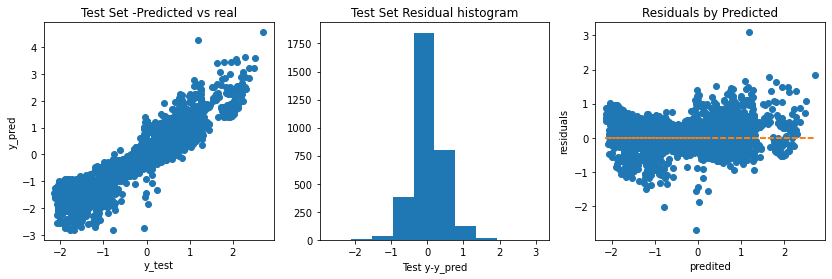

In [336]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

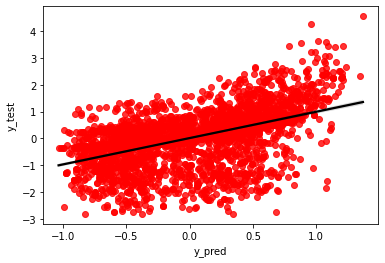

In [337]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})